In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random

In [2]:
def generate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0]*pt[1])/1.414
        if pt[0]>pt[1]:
            labels.append(0.0)
        else:
            labels.append(1.0)
    
    return np.array(inputs), np.array(labels).reshape(n, 1)
        
def generate_XOR_easy():
    inputs = []
    labels = []
    for i in range(11):
        inputs.append([0.1*i, 0.1*i])
        labels.append(0)       
        if 0.1*i == 0.5:
            continue
        inputs.append([0.1*i, 1-0.1*i])
        labels.append(1)
        
    return np.array(inputs), np.array(labels).reshape(21, 1)

In [3]:
x, y = generate_linear(n=100)

In [13]:
x, y = generate_XOR_easy()

In [15]:
epoch_draw = []
loss_draw = []

def sigmoid (x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

#Input datasets
inputs = np.array(x)
expected_output = np.array(y)

epochs = 10000
inputLayerNeurons, hidden1LayerNeurons, hidden2LayerNeurons, outputLayerNeurons = 2,4,4,1

#Random weights and bias init
hidden1_weights = np.random.uniform(size=(inputLayerNeurons,hidden1LayerNeurons))
hidden1_bias =np.random.uniform(size=(1,hidden1LayerNeurons))

hidden2_weights = np.random.uniform(size=(hidden1LayerNeurons,hidden2LayerNeurons))
hidden2_bias =np.random.uniform(size=(1,hidden2LayerNeurons))

output_weights = np.random.uniform(size=(hidden2LayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(size=(1,outputLayerNeurons))

#Training algorithm
for e in range(epochs): 
    
    loss = 0
    
    if e < epochs/4:
        lr = 0.3
    else:
        lr = 0.3*(1 - e/epochs)
        
#     lr = 0.3 - 0.3 * pow(5, (1 - epochs / (e + 0.00001)))

#     if e < epochs/4:
#         lr = 0.3
#     elif e < epochs/2:
#         lr = 0.1
#     elif e < epochs/4*3:
#         lr = 0.05
#     else:
#         lr = 0.01
        
    #Forward Propagation
    hidden1_layer_activation = np.dot(inputs,hidden1_weights)
    hidden1_layer_activation += hidden1_bias
    hidden1_layer_output = sigmoid(hidden1_layer_activation)
#     hidden1_layer_output = ReLU(hidden1_layer_activation)
    
    hidden2_layer_activation = np.dot(hidden1_layer_output,hidden2_weights)
    hidden2_layer_activation += hidden2_bias
    hidden2_layer_output = sigmoid(hidden2_layer_activation)
#     hidden2_layer_output = ReLU(hidden2_layer_activation)

    output_layer_activation = np.dot(hidden2_layer_output,output_weights)
    output_layer_activation += output_bias
    predicted_output = sigmoid(output_layer_activation)
#     predicted_output = ReLU(output_layer_activation)

    #Backpropagation
    error = expected_output - predicted_output
    #print(error)
    for each in error:
        loss += each[0]*each[0]
    d_predicted_output = error * sigmoid_derivative(predicted_output)
#     d_predicted_output = error * ReLU_derivative(predicted_output)

    error_hidden2_layer = d_predicted_output.dot(output_weights.T)
    d_hidden2_layer = error_hidden2_layer * sigmoid_derivative(hidden2_layer_output)
#     d_hidden2_layer = error_hidden2_layer * ReLU_derivative(hidden2_layer_output)
    
    error_hidden1_layer = d_hidden2_layer.dot(hidden2_weights.T)
    d_hidden1_layer = error_hidden1_layer * sigmoid_derivative(hidden1_layer_output)
#     d_hidden1_layer = error_hidden1_layer * ReLU_derivative(hidden1_layer_output)

    #Update Weights and Biases
    output_weights += hidden2_layer_output.T.dot(d_predicted_output) * lr
    output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
    hidden2_weights += hidden1_layer_output.T.dot(d_hidden2_layer) * lr
    hidden2_bias += np.sum(d_hidden2_layer,axis=0,keepdims=True) * lr
    hidden1_weights += inputs.T.dot(d_hidden1_layer) * lr
    hidden1_bias += np.sum(d_hidden1_layer,axis=0,keepdims=True) * lr
    
    if e%50==0:
        epoch_draw.append(e)
        loss_draw.append(loss)
        print("epoch={}, error={}".format(e, loss))
    

# print(predicted_output.shape)
# print(predicted_output)

epoch=0, error=8.70293353145995
epoch=500, error=5.237242678934333
epoch=1000, error=5.234508086028232
epoch=1500, error=5.218932033234961
epoch=2000, error=4.611783509256094
epoch=2500, error=1.3551102884185766
epoch=3000, error=0.9553069549791888
epoch=3500, error=0.9266055626490098
epoch=4000, error=0.9192612815074984
epoch=4500, error=0.9161987229249557
epoch=5000, error=0.9145864935466854
epoch=5500, error=0.9136175075851073
epoch=6000, error=0.9129849748529013
epoch=6500, error=0.9125494709016938
epoch=7000, error=0.9122394973111349
epoch=7500, error=0.9120151256623902
epoch=8000, error=0.9118526801750648
epoch=8500, error=0.9117375780002027
epoch=9000, error=0.9116607186454503
epoch=9500, error=0.911616571410535


In [16]:
print(predicted_output)

[[0.01084396]
 [0.90718881]
 [0.01043695]
 [0.90713268]
 [0.00983959]
 [0.90707516]
 [0.00938408]
 [0.90701629]
 [0.02906366]
 [0.90695611]
 [0.90689466]
 [0.03403991]
 [0.90683197]
 [0.00388654]
 [0.90676808]
 [0.00251581]
 [0.90670304]
 [0.00217562]
 [0.90663688]
 [0.00203501]
 [0.90656965]]


In [5]:
pred_y = []
for each in predicted_output:
    if each[0]<0.5:
        pred_y.append(0)
    else:
        pred_y.append(1)

In [6]:
def show_result(x, y, pred_y):
    plt.subplot(1,2,1)
    plt.title('Ground truth', fontsize=18)
    for i in range (x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    
    plt.subplot(1,2,2)
    plt.title('Predict truth', fontsize=18)
    for i in range (x.shape[0]):
        if pred_y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')       
    plt.show()

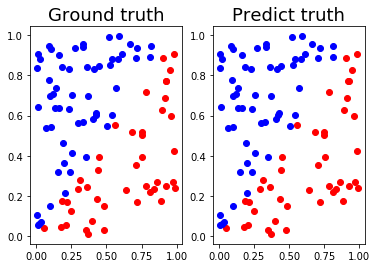

In [7]:
show_result(x, y, pred_y)

In [8]:
def test_accuracy(train_y, pred_y):
    wrong = 0.0
    for i in range(len(train_y)):
        if train_y[i] != pred_y[i]:
            wrong += 1.0
    return (len(train_y)-wrong)/len(train_y)

In [9]:
acc = test_accuracy(y, pred_y)
print(acc)

1.0


In [10]:
def show_learning_curve(epoch, loss):
    plt.plot(epoch, loss)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

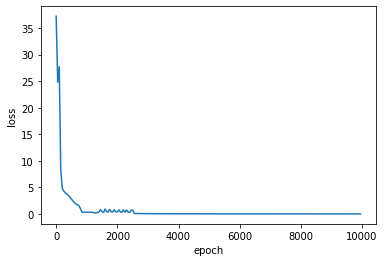

In [11]:
show_learning_curve(epoch_draw, loss_draw)

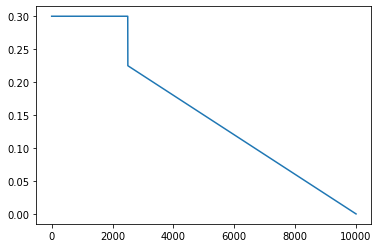

In [12]:
epochs = 10000
learning_rate = 0.6
decay_rate = 3

decay_steps_a = []
decayed_learning_rate_a = []

for e in range(epochs):
    if e < epochs/4:
        lr = 0.3
    else:
        lr = 0.3*(1 - e/epochs)
    decay_steps_a.append(e)
    decayed_learning_rate_a.append(lr)
    
plt.plot(decay_steps_a, decayed_learning_rate_a)
plt.show()

In [ ]:
def ReLU(x):
    return np.maximum(0,x)

def ReLU_derivative(x):
    tmp = x
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if x[i][j] > 0:
                tmp[i][j] = 1
            else:
                tmp[i][j] = 0
    return tmp

In [ ]:
def arctan (x):
    return np.arctan(x)

def arctan_derivative(x):
    tmp = x
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            tmp[i][j] = 1 / (x[i][j]**2 + 1)
    return tmp